In [1]:
import CalculatedFieldSubroutines as cfs
import pandas as pd
from CalculatedFieldSubroutines import BinaryDrivingMode
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
gmIDS=cfs.list_whitelisted_gmIDs()

In [3]:
BluegmIDs=[]
for gmID in gmIDS:
    if cfs.give_route(gmID)=="Blue":
        BluegmIDs.append(gmID)
        

In [4]:
print (BluegmIDs)

['f0bcec4e-ed3e-11ee-9385-ef789ffde1d3', '8b6a6cfc-ed6d-11ee-9385-ef789ffde1d3', '5fcc4fd8-ea71-11ee-b297-3b0ad9d5d6c6', '7228e03a-ebf0-11ee-b297-3b0ad9d5d6c6', '6af236d6-d98f-11ee-a158-97f8443fd730', 'c335d84c-a45c-11ee-88ec-eb6a8d5269b4', 'aa86a660-dc05-11ee-a158-97f8443fd730', '3ea96640-ea37-11ee-b297-3b0ad9d5d6c6', 'c9023e32-ed90-11ee-9385-ef789ffde1d3', '5240e750-ec30-11ee-b297-3b0ad9d5d6c6', 'c0624e24-d9aa-11ee-a158-97f8443fd730', 'a7c98b32-ebc2-11ee-b297-3b0ad9d5d6c6', 'd1d090d4-ea7c-11ee-b297-3b0ad9d5d6c6', '57d240d6-ea4d-11ee-b297-3b0ad9d5d6c6', '8c57e8ac-dbec-11ee-a158-97f8443fd730', '20cbfe8c-ea2b-11ee-b297-3b0ad9d5d6c6', '3a2a78cc-db21-11ee-a158-97f8443fd730', 'baf0e4be-bede-11ee-835b-599066b5eb60', '04115e66-ea91-11ee-b297-3b0ad9d5d6c6', '326699c2-ecd8-11ee-b297-3b0ad9d5d6c6', '88180f82-ed4f-11ee-9385-ef789ffde1d3', '71a18322-ecab-11ee-b297-3b0ad9d5d6c6', '70060810-eb59-11ee-b297-3b0ad9d5d6c6', '19b7ebd0-d9b7-11ee-a158-97f8443fd730', '721a9830-ece6-11ee-b297-3b0ad9d5d6c6',

In [5]:
print (len(BluegmIDs))

97


In [6]:
final_df = pd.DataFrame()

In [7]:
training_BluegmIDs_num = int(97 * .8)
test_BluegmIDs_num = len( BluegmIDs) - training_BluegmIDs_num
print( training_BluegmIDs_num )
print( test_BluegmIDs_num )

77
20


In [8]:
BluegmIDs = BluegmIDs

# Convert the list to a pandas DataFrame
BluegmIDs_DF = pd.DataFrame({'gmids': BluegmIDs})

# Randomly sample 77 gmids
Training_BluegmIDs_DF = BluegmIDs_DF.sample(n=77, random_state=42)

# Get the remaining 20 gmids
Test_BluegmIDs_DF = BluegmIDs_DF.drop(Training_BluegmIDs_DF.index)

# Print the results
print("Training Set (77 GMIDs):")
print(Training_BluegmIDs_DF)
print("\nTest Set (20 GMIDs):")
print(Test_BluegmIDs_DF)

Training Set (77 GMIDs):
                                   gmids
62  47561998-d9c3-11ee-a158-97f8443fd730
40  df8e3742-ec54-11ee-b297-3b0ad9d5d6c6
93  9830d896-d2dc-11ee-b437-336917683bb8
18  04115e66-ea91-11ee-b297-3b0ad9d5d6c6
81  dc39aa14-db32-11ee-a158-97f8443fd730
..                                   ...
48  f6ac3c82-a445-11ee-88ec-eb6a8d5269b4
84  5976b77a-a504-11ee-88ec-eb6a8d5269b4
57  3441fc36-ecca-11ee-b297-3b0ad9d5d6c6
32  43914d48-ed85-11ee-9385-ef789ffde1d3
91  a253145a-d2a6-11ee-b437-336917683bb8

[77 rows x 1 columns]

Test Set (20 GMIDs):
                                   gmids
1   8b6a6cfc-ed6d-11ee-9385-ef789ffde1d3
2   5fcc4fd8-ea71-11ee-b297-3b0ad9d5d6c6
14  8c57e8ac-dbec-11ee-a158-97f8443fd730
20  88180f82-ed4f-11ee-9385-ef789ffde1d3
21  71a18322-ecab-11ee-b297-3b0ad9d5d6c6
23  19b7ebd0-d9b7-11ee-a158-97f8443fd730
29  69ab88ec-dc17-11ee-a158-97f8443fd730
37  154fab12-a43f-11ee-88ec-eb6a8d5269b4
51  76683d3c-db18-11ee-a158-97f8443fd730
52  286c70cc-d2f7-11ee-b437-

In [9]:
final_df = pd.DataFrame()

In [10]:
for gmID in BluegmIDs:
    gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )
    gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis')
    gmID_chassis_df = gmID_chassis_df.sort_values("time")
    gmID_best_pose_df = gmID_best_pose_df.sort_values("time")

    cfs.BinaryDrivingMode(gmID_chassis_df)
    cfs.TernaryDrivingModeTransition(gmID_chassis_df)
    cfs.LatLonTotalStdDev(gmID_best_pose_df)
    
    cfs.ChassisBestPoseMatchedTime(gmID_chassis_df, gmID_best_pose_df)
    merged_df = pd.merge(gmID_chassis_df, gmID_best_pose_df, on='ChassisBestPoseMatchedTime')
    final_df = pd.concat([final_df,merged_df])


In [11]:
for c in final_df.columns:
    print(c)

brakePercentage
groupMetadataID_x
drivingMode
speedMps
time_x
throttlePercentage
steeringPercentage
signal.turnSignal
BinaryDrivingMode
TernaryDrivingModeTransition
ChassisBestPoseMatchedTime
heightMsl
groupMetadataID_y
latitudeStdDev
longitude
solType
extendedSolutionStatus
time_y
heightStdDev
solStatus
latitude
longitudeStdDev
numSatsInSolution
LatLonTotalStdDev


In [12]:
# Specify train and test identifiers
Training_BluegmIDs_DF = (
'7228e03a-ebf0-11ee-b297-3b0ad9d5d6c6',
'8c57e8ac-dbec-11ee-a158-97f8443fd730',
'17876fec-ea66-11ee-b297-3b0ad9d5d6c6',
'd1d090d4-ea7c-11ee-b297-3b0ad9d5d6c6',
'ed7f2038-ea1e-11ee-b297-3b0ad9d5d6c6',
'6af236d6-d98f-11ee-a158-97f8443fd730',
'64737d98-d312-11ee-b437-336917683bb8',
'5240e750-ec30-11ee-b297-3b0ad9d5d6c6',
'7613801a-edcb-11ee-9385-ef789ffde1d3',
'68c289fa-dbd4-11ee-a158-97f8443fd730',
'76683d3c-db18-11ee-a158-97f8443fd730',
'69ab88ec-dc17-11ee-a158-97f8443fd730',
'7f09f6c6-a5b0-11ee-88ec-eb6a8d5269b4',
'3d2a80f0-ec81-11ee-b297-3b0ad9d5d6c6',
'feaf2ba8-d28d-11ee-b437-336917683bb8',
'e2079a78-dc1d-11ee-a158-97f8443fd730',
'b224ef9c-ec10-11ee-b297-3b0ad9d5d6c6',
'ba28b352-ec8f-11ee-b297-3b0ad9d5d6c6',
'59c189d8-ed54-11ee-9385-ef789ffde1d3',
'2d35c522-eba2-11ee-b297-3b0ad9d5d6c6',
'3343fd3c-eb87-11ee-b297-3b0ad9d5d6c6',
'c0624e24-d9aa-11ee-a158-97f8443fd730',
'a253145a-d2a6-11ee-b437-336917683bb8',
'9830d896-d2dc-11ee-b437-336917683bb8',
'aa86a660-dc05-11ee-a158-97f8443fd730',
'90101c36-a621-11ee-88ec-eb6a8d5269b4',
'82d39c74-ea59-11ee-b297-3b0ad9d5d6c6',
'f9d62032-db2a-11ee-a158-97f8443fd730',
'af10e22a-ebb1-11ee-b297-3b0ad9d5d6c6',
'47561998-d9c3-11ee-a158-97f8443fd730',
'64875cc0-d054-11ee-9435-f7e542e2436c',
'df8e3742-ec54-11ee-b297-3b0ad9d5d6c6',
'3a2a78cc-db21-11ee-a158-97f8443fd730',
'21a9830-ece6-11ee-b297-3b0ad9d5d6c6',
'2bc6ebb8-a529-11ee-88ec-eb6a8d5269b4',
'4d0254fc-ec73-11ee-b297-3b0ad9d5d6c6',
'dc39aa14-db32-11ee-a158-97f8443fd730',
'25d3bdc8-ecbc-11ee-b297-3b0ad9d5d6c6',
'8b6a6cfc-ed6d-11ee-9385-ef789ffde1d3',
'e6d7d384-db40-11ee-a158-97f8443fd730',
'a17c1280-ea10-11ee-b297-3b0ad9d5d6c6',
'36663b02-ea87-11ee-b297-3b0ad9d5d6c6',
'71a18322-ecab-11ee-b297-3b0ad9d5d6c6',
'cf6fdf3a-eaa3-11ee-b297-3b0ad9d5d6c6',
'57d240d6-ea4d-11ee-b297-3b0ad9d5d6c6',
'baf0e4be-bede-11ee-835b-599066b5eb60',
'530de03a-ed79-11ee-9385-ef789ffde1d3',
'43914d48-ed85-11ee-9385-ef789ffde1d3',
'a7c98b32-ebc2-11ee-b297-3b0ad9d5d6c6',
'fc119dfc-eb67-11ee-b297-3b0ad9d5d6c6',
'c7c02bda-ebe0-11ee-b297-3b0ad9d5d6c6',
'39ba7438-d0d5-11ee-9435-f7e542e2436c',
'e8a8b2be-edbf-11ee-9385-ef789ffde1d3',
'3ea96640-ea37-11ee-b297-3b0ad9d5d6c6',
'21376e38-ec01-11ee-b297-3b0ad9d5d6c6',
'513a670c-eea9-11ee-9385-ef789ffde1d3',
'06cbdbc0-db4d-11ee-a158-97f8443fd730',
'559495ca-d270-11ee-b437-336917683bb8',
'04151804-ec20-11ee-b297-3b0ad9d5d6c6',
'd62ee6e8-ed02-11ee-9385-ef789ffde1d3',
'154fab12-a43f-11ee-88ec-eb6a8d5269b4',
'58263e34-a45c-11ee-88ec-eb6a8d5269b4',
'acd71bc0-ecf4-11ee-9385-ef789ffde1d3',
'3441fc36-ecca-11ee-b297-3b0ad9d5d6c6',
'f671c05c-a5e4-11ee-88ec-eb6a8d5269b4',
'c8f54ac0-ebd2-11ee-b297-3b0ad9d5d6c6',
'326699c2-ecd8-11ee-b297-3b0ad9d5d6c6',
'3ce8a358-edd8-11ee-9385-ef789ffde1d3',
'286c70cc-d2f7-11ee-b437-336917683bb8',
'20cbfe8c-ea2b-11ee-b297-3b0ad9d5d6c6',
'c9023e32-ed90-11ee-9385-ef789ffde1d3',
'f0bcec4e-ed3e-11ee-9385-ef789ffde1d3',
'd94ef300-ed60-11ee-9385-ef789ffde1d3',
'e269948a-ed9d-11ee-9385-ef789ffde1d3',
'f6ac3c82-a445-11ee-88ec-eb6a8d5269b4',
'80340ab8-d054-11ee-9435-f7e542e2436c',
'b76f33be-ea61-11ee-b297-3b0ad9d5d6c6')

Test_BluegmIDs_DF = (
'da853e0c-a10f-11ee-981c-d126ddbe9afa',
'19b7ebd0-d9b7-11ee-a158-97f8443fd730',
'cb205756-ec43-11ee-b297-3b0ad9d5d6c6',
'64bbe8e0-eb94-11ee-b297-3b0ad9d5d6c6',
'e9d67bf2-ec35-11ee-b297-3b0ad9d5d6c6',
'787d9684-d2c2-11ee-b437-336917683bb8',
'0f4f0a06-ea98-11ee-b297-3b0ad9d5d6c6',
'5f6573ba-ed2f-11ee-9385-ef789ffde1d3',
'60546ef4-edaa-11ee-9385-ef789ffde1d3',
'20f0b890-ec64-11ee-b297-3b0ad9d5d6c6',
'04115e66-ea91-11ee-b297-3b0ad9d5d6c6',
'aef91c4a-ede5-11ee-9385-ef789ffde1d3',
'c335d84c-a45c-11ee-88ec-eb6a8d5269b4',
'75f83e28-eb77-11ee-b297-3b0ad9d5d6c6',
'88180f82-ed4f-11ee-9385-ef789ffde1d3',
'70060810-eb59-11ee-b297-3b0ad9d5d6c6',
'6d62da08-ec9d-11ee-b297-3b0ad9d5d6c6',
'5976b77a-a504-11ee-88ec-eb6a8d5269b4',
'ba6e1072-9524-11ee-956e-9da2d070324c',
'5fcc4fd8-ea71-11ee-b297-3b0ad9d5d6c6')


# Filterataframe into training and testing sets based on the identifiers
train_df = final_df[final_df['groupMetadataID_x'].isin(Training_BluegmIDs_DF)]
test_df = final_df[final_df['groupMetadataID_x'].isin(Test_BluegmIDs_DF)]

# Separate features (X) and target (y) for both training and testing sets
X_train = train_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_train = train_df['BinaryDrivingMode']  # Ensure this column name matches your target variable

X_test = test_df[['brakePercentage', 'throttlePercentage', 'steeringPercentage', 'speedMps', 'LatLonTotalStdDev']]
y_test = test_df['BinaryDrivingMode']

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8213
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65    298100
           1       0.86      0.91      0.88    785958

    accuracy                           0.82   1084058
   macro avg       0.78      0.75      0.76   1084058
weighted avg       0.82      0.82      0.82   1084058



In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[178239 119861]
 [ 73834 712124]]


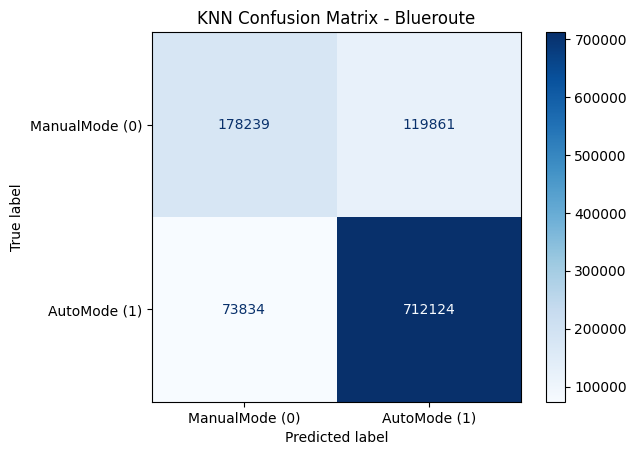

In [14]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['ManualMode (0)', 'AutoMode (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with a title
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix - Blueroute")
plt.show()

In [15]:
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}')

Balanced accuracy: 0.7520


In [16]:
fig = px.scatter_mapbox(test_df,
                        lat='latitude',
                        lon='longitude',
                        color='BinaryDrivingMode',  
                        hover_data=['BinaryDrivingMode'],
                        opacity=0.5,
                        zoom=12,
                        height=600,
                        mapbox_style='open-street-map')
fig.update_traces(marker=dict(size=10))
fig.show()


NameError: name 'px' is not defined